In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Resources costs
R1, R2, R3 = 1200, 1000, 1250 

# Works estimation
Apoint, Amin, Amax = 3, 3, 7
Bpoint, Bmin, Bmax = 2, 2, 5
Cpoint, Cmin, Cmax = 3, 2, 5
Dpoint, Dmin, Dmax = 4, 4, 7
Epoint, Emin, Emax = 3, 1, 3
Fpoint, Fmin, Fmax = 4, 2, 6
Gpoint, Gmin, Gmax = 5, 4, 7
Hpoint, Hmin, Hmax = 4, 3, 6 

In [ ]:
n = 1000 # number of Monte Carlo simulations

# Simulation DataFrame

df = pd.DataFrame({'id' : [i for i in range(1,n+1) ],
                   'A'  : np.round(np.random.normal( loc = (Amin+ Amax) / 2, scale = (Amax - Amin) / 3.29, size = n), decimals = 0),
                   'B'  : np.round(np.random.normal( loc = (Bmin+ Bmax) / 2, scale = (Bmax - Bmin) / 3.29, size = n), decimals = 0),
                   'C'  : np.round(np.random.normal( loc = (Cmin+ Cmax) / 2, scale = (Cmax - Cmin) / 3.29, size = n), decimals = 0),
                   'D'  : np.round(np.random.normal( loc = (Dmin+ Dmax) / 2, scale = (Dmax - Dmin) / 3.29, size = n), decimals = 0),
                   'E'  : np.round(np.random.normal( loc = (Emin+ Emax) / 2, scale = (Emax - Emin) / 3.29, size = n), decimals = 0),
                   'F'  : np.round(np.random.normal( loc = (Fmin+ Fmax) / 2, scale = (Fmax - Fmin) / 3.29, size = n), decimals = 0),
                   'G'  : np.round(np.random.normal( loc = (Gmin+ Gmax) / 2, scale = (Gmax - Gmin) / 3.29, size = n), decimals = 0),
                   'H'  : np.round(np.random.normal( loc = (Hmin+ Hmax) / 2, scale = (Hmax - Hmin) / 3.29, size = n), decimals = 0),
                   }).set_index('id')

In [ ]:
path1 = df.B + np.where(df.C > df.D, df.C,df.D) + df.E
path2 = df.F + df.G
df['Time'] = df.A + np.where(path1 > path2, path1, path2) + df.H

df['Cost1'] = (df.A + df.B + df.C + df.H) * R1
df['Cost2'] = (df.D + df.E) * R2
df['Cost3'] = (df.F + df.G) * R3
df['Cost'] = df.Cost1 + df.Cost2 + df.Cost3

In [ ]:
# Point estimation

path1 = Fpoint + Gpoint
path2 = Bpoint + Epoint + (Cpoint if Cpoint > Dpoint else Dpoint)
Time = Apoint + (path2 if path2 > path1 else path1) + Hpoint
Cost = (Apoint + Bpoint + Cpoint + Hpoint) * R1 + (Dpoint + Epoint) * R2 + (Fpoint + Gpoint) * R3
print(f'Point estimation: Time = {Time : 2d} Cost = {Cost :4d}')

Point estimation: Time =  16 Cost = 32650


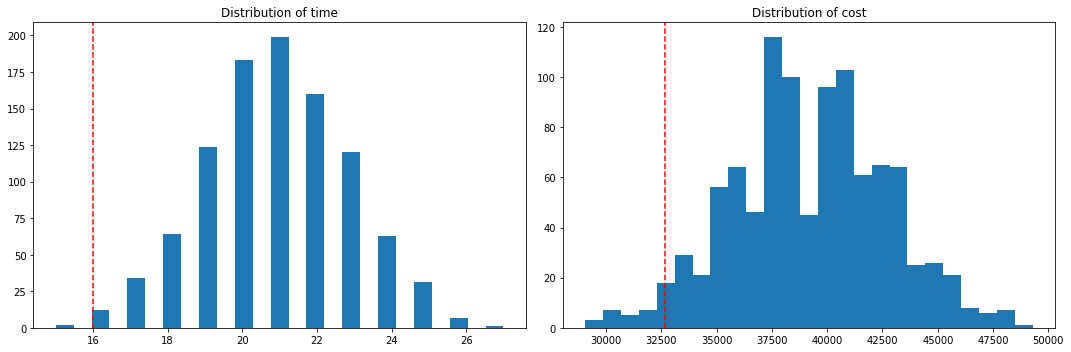

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
ax[0].hist(df.Time, bins = 25);
ax[0].axvline(Time, c = 'r', ls = '--');
ax[0].set_title('Distribution of time');
ax[1].hist(df.Cost, bins = 25);
ax[1].axvline(Cost, c = 'r', ls = '--');
ax[1].set_title('Distribution of cost');
fig.tight_layout();

In [ ]:
# Probability to be in time and budget (Risks)

print('           | p(c <= C) | p(c > C)')
print('--------------------------------')
print(f' p(t <= T) | {df[(df.Time <= Time) & (df.Cost <= Cost)].Time.count() / n :.3f}     | \
{df[(df.Time <= Time) & (df.Cost > Cost)].Time.count() / n :.3f}')
print(f' p(t > T)  | {df[(df.Time > Time) & (df.Cost <= Cost)].Time.count() / n :.3f}     | \
{df[(df.Time > Time) & (df.Cost > Cost)].Time.count() / n :.3f}')

           | p(c <= C) | p(c > C)
--------------------------------
 p(t <= T) | 0.011     | 0.003
 p(t > T)  | 0.020     | 0.966


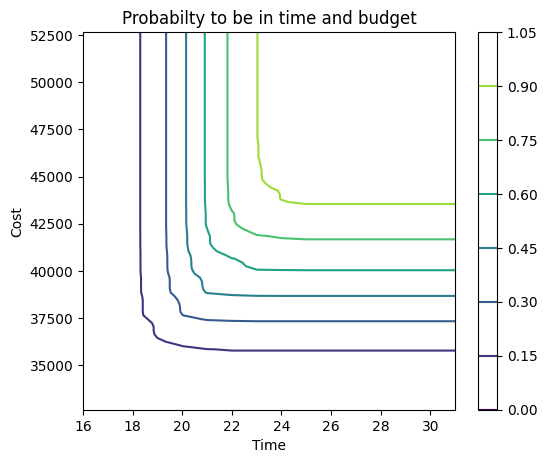

In [ ]:
timelist = np.linspace(Time, Time + 15, 16)
costlist = np.linspace(Cost, Cost + 20000, 101)
X, Y = np.meshgrid(timelist, costlist)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
  for j in range(X.shape[1]):
    Z[i,j] = df[(df.Time <= X[i,j]) & (df.Cost <= Y[i,j])].Time.count() / n

fig,ax=plt.subplots(1,1, figsize = (6,5), dpi = 100)
cp = ax.contour(X, Y, Z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Probabilty to be in time and budget')
ax.set_xlabel('Time')
ax.set_ylabel('Cost')
plt.show()

In [ ]:
NewTime = 24
NewCost = 47500

print('           | p(c <= C) | p(c > C)')
print('--------------------------------')
print(f' p(t <= T) | {df[(df.Time <= NewTime) & (df.Cost <= NewCost)].Time.count() / n :.3f}     | \
{df[(df.Time <= NewTime) & (df.Cost > NewCost)].Time.count() / n :.3f}')
print(f' p(t > T)  | {df[(df.Time > NewTime) & (df.Cost <= NewCost)].Time.count() / n :.3f}     | \
{df[(df.Time > NewTime) & (df.Cost > NewCost)].Time.count() / n :.3f}')

           | p(c <= C) | p(c > C)
--------------------------------
 p(t <= T) | 0.959     | 0.002
 p(t > T)  | 0.033     | 0.006
